In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

/Users/akshay/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [48]:
df = pd.read_csv("../data/run_1.csv", header=None, names=["UCT", "ExIt"])
df.head()

,UCT,ExIt
0,2,3
1,1,3
2,1,3
3,2,3
4,3,1


Overall accuracy: 20.51282051282051 %
ExIt   1   2    3
UCT              
1      0   0  185
2      0  53   41
3     53   0   19


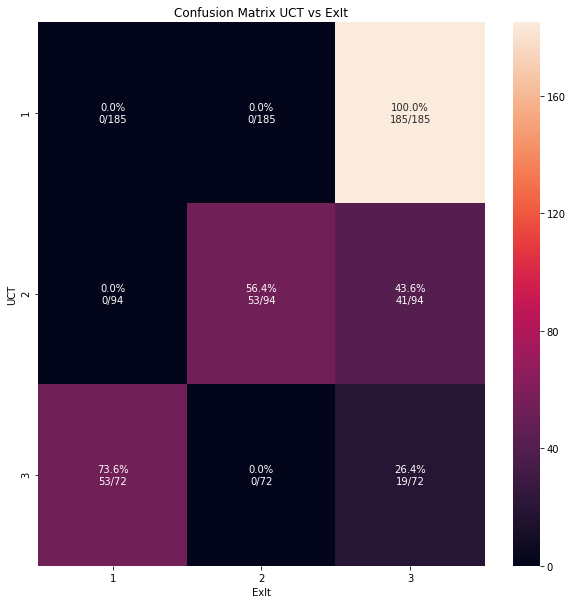

In [88]:
labels=[1,2,3]
figsize=(10,10)
cfm = confusion_matrix(df.UCT, df.ExIt, labels=labels)
acc = np.sum(cfm.diagonal()) / np.sum(cfm)
print('Overall accuracy: {} %'.format(acc*100))
sum_cfm = np.sum(cfm, axis=1, keepdims=True)
percent_cfm = cfm / sum_cfm.astype(float) * 100
annot = np.empty_like(cfm).astype(str)
rows, cols = cfm.shape
for row in range(rows):
    for col in range(cols):
        annot[row, col] = '%.1f%%\n%d/%d' % (percent_cfm[row, col], cfm[row, col], sum_cfm[row])
cfm = pd.DataFrame(cfm, index=labels, columns=labels)
cfm.index.name = 'UCT'
cfm.columns.name = 'ExIt'
fig, ax = plt.subplots(figsize=figsize)
plt.title("Confusion Matrix UCT vs ExIt")
sns.heatmap(cfm, annot=annot, fmt='', ax=ax)
plt.savefig("../images/cfm_for_UCT_vs_ExIt")
print(cfm)